<a href="https://colab.research.google.com/github/karriechou/inf2179-ml-challenge/blob/main/KarrieChou_inf2179_ml_challenge_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [64]:
random.seed(123)

# One-hot encoding of variables

In [65]:
training_data = pd.read_csv("https://raw.githubusercontent.com/karriechou/inf2179-ml-challenge/main/train.csv?token=GHSAT0AAAAAACAERMZHVMB2HMU4O3U56F7MZATQELA")
training_data.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN06611,1,0,1,1,Meal Plan 2,0,Room_Type 1,247,2018,6,6,Offline,0,0,0,90.00,0,Not_Canceled
1,INN28944,2,0,0,3,Meal Plan 1,0,Room_Type 4,48,2018,6,8,Online,0,0,0,98.87,2,Not_Canceled
2,INN21921,2,0,1,5,Meal Plan 1,0,Room_Type 4,124,2018,9,20,Online,0,0,0,143.10,0,Canceled
3,INN12669,1,0,0,2,Meal Plan 1,1,Room_Type 1,37,2017,9,16,Online,0,0,0,85.50,0,Not_Canceled
4,INN30837,3,0,1,3,Meal Plan 1,0,Room_Type 4,73,2018,7,4,Online,0,0,0,150.30,2,Not_Canceled


In [66]:
# training_data["type_of_meal_plan"].unique()
training_data["type_of_meal_plan_onehot"] = training_data["type_of_meal_plan"].replace({"Not Selected": 0, 
                                                                                        "Meal Plan 1": 1, 
                                                                                        "Meal Plan 2": 2, 
                                                                                        "Meal Plan 3": 3})

# training_data["room_type_reserved"].unique()
training_data["room_type_reserved_onehot"] = training_data["room_type_reserved"].replace({"Room_Type 1": 0, 
                                                                                          "Room_Type 2": 1, 
                                                                                          "Room_Type 3": 2, 
                                                                                          "Room_Type 4": 3, 
                                                                                          "Room_Type 5": 4, 
                                                                                          "Room_Type 6": 5, 
                                                                                          "Room_Type 7": 6})

# training_data["arrival_year"].unique()
training_data["arrival_year_onehot"] = training_data["arrival_year"].replace({2017: 0, 
                                                                              2018: 1})


# training_data["market_segment_type"].unique()
training_data["market_segment_type_onehot"] = training_data["market_segment_type"].replace({"Offline": 0, 
                                                                                            "Online": 1, 
                                                                                            "Corporate": 2, 
                                                                                            "Aviation": 3, 
                                                                                            "Complementary": 4})

# Feature engineering

In [67]:
training_data["stay_length"] = training_data["no_of_weekend_nights"] + training_data["no_of_week_nights"]
training_data["no_of_guests"] = training_data["no_of_children"] + training_data["no_of_adults"]

# EDA – plots

## Types of guests on each booking: children vs. adults. 

<BarContainer object of 2 artists>

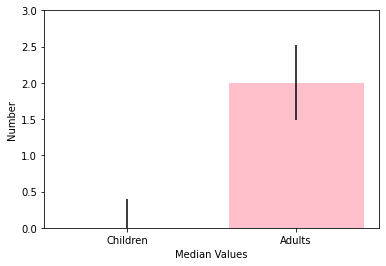

In [68]:
children_median = np.median(training_data["no_of_children"])
children_sd = np.std(training_data["no_of_children"])

adults_median = np.median(training_data["no_of_adults"])
adults_sd = np.std(training_data["no_of_adults"])

plt.ylim(0, 3)
plt.xlabel("Median Values")
plt.ylabel("Number")
plt.bar(x = ["Children", "Adults"], height = [children_median, adults_median], 
        yerr = [children_sd, adults_sd], color = "pink")

<BarContainer object of 6 artists>

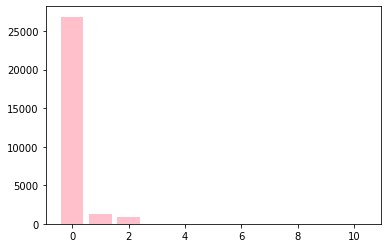

In [69]:
no_of_children_index = training_data["no_of_children"].value_counts().index.tolist()
no_of_children_count = training_data["no_of_children"].value_counts()
plt.bar(x = no_of_children_index, height = no_of_children_count, color ="pink")

<BarContainer object of 5 artists>

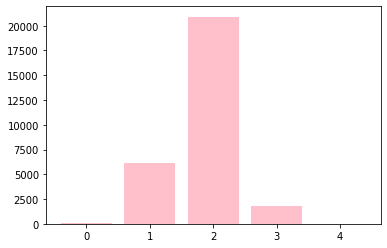

In [70]:
no_of_adults_index = training_data["no_of_adults"].value_counts().index.tolist()
no_of_adults_count = training_data["no_of_adults"].value_counts()
plt.bar(x = no_of_adults_index, height = no_of_adults_count, color = "pink")

<Axes: xlabel='no_of_adults', ylabel='no_of_children'>

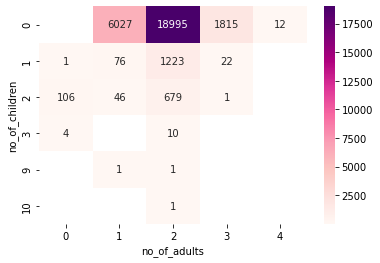

In [71]:
adults_vs_children = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "no_of_adults", index = "no_of_children", aggfunc = "count")
sns.heatmap(adults_vs_children, cmap = "RdPu", annot = True, fmt = ".0f")

## Stay length and number of guests. 

<BarContainer object of 24 artists>

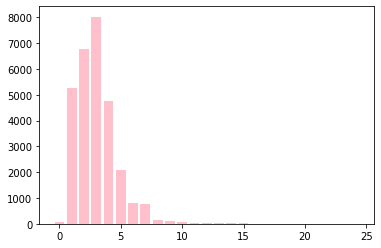

In [72]:
stay_length_index = training_data["stay_length"].value_counts().index.tolist()
stay_length_counts = training_data["stay_length"].value_counts()
plt.bar(x = stay_length_index, height = stay_length_counts, color ="pink")

<BarContainer object of 8 artists>

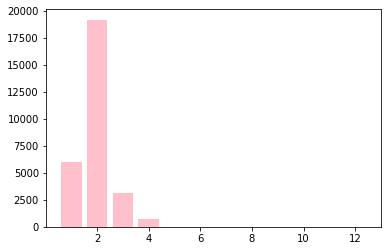

In [73]:
no_of_guests_index = training_data["no_of_guests"].value_counts().index.tolist()
no_of_guests_counts = training_data["no_of_guests"].value_counts()
plt.bar(x = no_of_guests_index, height = no_of_guests_counts, color = "pink")

In [74]:
no_of_guests_index = training_data["no_of_guests"].value_counts().index.tolist()
print(no_of_guests_index)

[2, 1, 3, 4, 5, 11, 12, 10]


<Axes: xlabel='no_of_guests', ylabel='stay_length'>

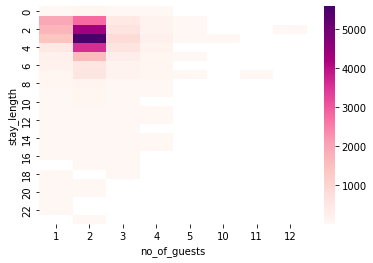

In [81]:
guests_vs_staylength = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "no_of_guests", index = "stay_length", aggfunc = "count")
sns.heatmap(guests_vs_staylength, cmap = "RdPu")

## Lead times. 

## Related to cancellations. 

<Axes: xlabel='booking_status', ylabel='market_segment_type'>

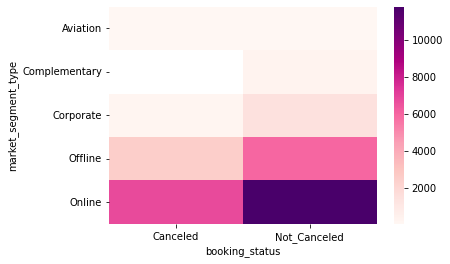

In [89]:
booking_types_and_cancellations = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "booking_status", index = "market_segment_type", aggfunc = "count")
sns.heatmap(booking_types_and_cancellations, cmap = "RdPu")

<Axes: xlabel='booking_status', ylabel='no_of_guests'>

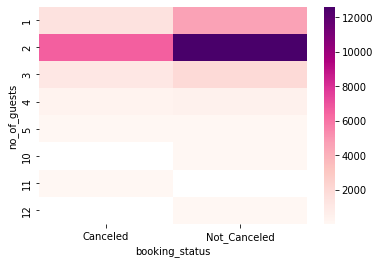

In [100]:
no_guests_and_cancellations = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "booking_status", index = "no_of_guests", aggfunc = "count")
sns.heatmap(no_guests_and_cancellations, cmap = "RdPu")

<Axes: xlabel='booking_status', ylabel='required_car_parking_space'>

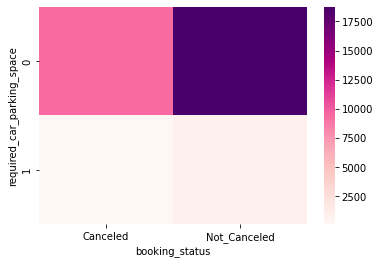

In [102]:
parking_and_cancellations = pd.pivot_table(data = training_data, values = "Booking_ID", columns = "booking_status", index = "required_car_parking_space", aggfunc = "count")
sns.heatmap(parking_and_cancellations, cmap = "RdPu")

# EDA – t-tests


# KNN Classifier

Look at Tutorial 6. 